# REGRESSION

In [1]:
# import the libraries

%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# sklearn :: evaluation
from sklearn.metrics import mean_squared_error

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Problem definition

Predict the avg. expected delay of a flight.

________________________
# Load Data

### Final merged dataset can be downloaded from here: https://www.kaggle.com/arwasheraky/final_merged_flights_2015

In [2]:
df = pd.read_csv('../../Data/flightsmerged_final.csv', low_memory=False)

In [3]:
df.head()

,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,DESTINATION_NAME,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE,ORIGIN_AVG_TEMP,ORIGIN_MIN_TEMP,ORIGIN_MAX_TEMP,DEST_AVG_TEMP,DEST_MIN_TEMP,DEST_MAX_TEMP
0,1,1,98,N407AS,00:05:00,23:54:00,-11.00,205.00,1448,04:30:00,...,Seattle-Tacoma International Airport,WA,47.45,-122.31,10.00,4.00,16.00,35.00,30.00,41.00
1,1,1,2336,N3KUAA,00:10:00,00:02:00,-8.00,280.00,2330,07:50:00,...,Palm Beach International Airport,FL,26.68,-80.10,47.00,38.00,58.00,59.00,50.00,70.00
2,1,1,840,N171US,00:20:00,00:18:00,-2.00,286.00,2296,08:06:00,...,Charlotte Douglas International Airport,NC,35.21,-80.94,47.00,38.00,58.00,39.00,29.00,51.00
3,1,1,258,N3HYAA,00:20:00,00:15:00,-5.00,285.00,2342,08:05:00,...,Miami International Airport,FL,25.79,-80.29,47.00,38.00,58.00,59.00,50.00,70.00
4,1,1,135,N527AS,00:25:00,00:24:00,-1.00,235.00,1448,03:20:00,...,Ted Stevens Anchorage International Airport,AK,61.17,-150.00,35.00,30.00,41.00,10.00,4.00,16.00


In [4]:
df.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'CLASS', 'AIRLINE_CODE',
       'AIRLINE_NAME', 'ORIGIN_AC', 'ORIGIN_NAME', 'ORIGIN_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_AC',
       'DESTINATION_NAME', 'DEST_STATE', 'DEST_LATITUDE', 'DEST_LONGITUDE',
       'ORIGIN_AVG_TEMP', 'ORIGIN_MIN_TEMP', 'ORIGIN_MAX_TEMP',
       'DEST_AVG_TEMP', 'DEST_MIN_TEMP', 'DEST_MAX_TEMP'],
      dtype='object')

____

# Feature Engineering

In [7]:
df.isnull().sum()

MONTH                  0
DAY                    0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DATE                   0
CLASS                  0
AIRLINE_CODE           0
AIRLINE_NAME           0
ORIGIN_AC              0
ORIGIN_NAME            0
ORIGIN_STATE           0
ORIGIN_LATITUDE        0
ORIGIN_LONGITUDE       0
DESTINATION_AC         0
DESTINATION_NAME       0
DEST_STATE             0
DEST_LATITUDE          0
DEST_LONGITUDE         0
ORIGIN_AVG_TEMP        0
ORIGIN_MIN_TEMP        0
ORIGIN_MAX_TEMP        0
DEST_AVG_TEMP          0
DEST_MIN_TEMP          0
DEST_MAX_TEMP          0
dtype: int64

In [8]:
df = df.dropna()
df.shape

(5058206, 37)

## Add a column

In [9]:
# Average delay column --> Predicited column

df['AVG_DELAY'] = (df['DEPARTURE_DELAY'] + df['ARRIVAL_DELAY']) / 2.0
df['AVG_DELAY'].head(10)

0   -16.50
1    -8.50
2     1.50
3    -7.00
4   -11.00
5     1.50
6   -11.50
7     2.00
8   -12.00
9    -6.00
Name: AVG_DELAY, dtype: float64

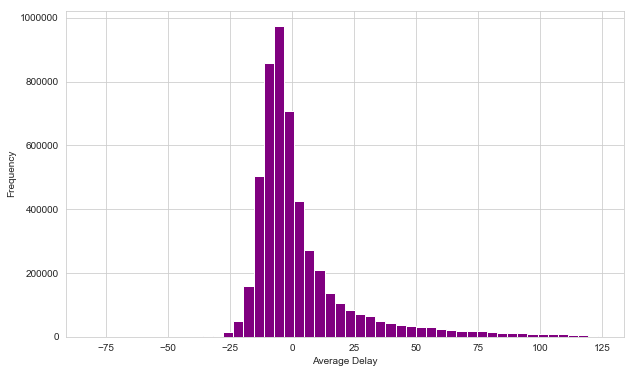

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['AVG_DELAY'], bins=50, color='purple')
plt.xlabel("Average Delay")
plt.ylabel("Frequency")
plt.show()

## Label encoding

In [11]:
# get_dummies

# Convert MONTH to STRING
df['MONTH'] = df['MONTH'].replace(to_replace = list(range(1, 13)),
                                  value=['1','2','3','4','5','6','7','8','9','10','11','12'])

categorical = ['AIRLINE_NAME','MONTH','DEST_STATE','ORIGIN_STATE','DESTINATION_AC','ORIGIN_AC']

df_dummies = pd.get_dummies(df[categorical])
df = pd.concat([df, df_dummies], axis=1)


In [12]:
df.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL',
       ...
       'ORIGIN_AC_TYR', 'ORIGIN_AC_TYS', 'ORIGIN_AC_VEL', 'ORIGIN_AC_VLD',
       'ORIGIN_AC_VPS', 'ORIGIN_AC_WRG', 'ORIGIN_AC_WYS', 'ORIGIN_AC_XNA',
       'ORIGIN_AC_YAK', 'ORIGIN_AC_YUM'],
      dtype='object', length=787)

## Change Time to Int

In [13]:
# Convert the time to seconds

def time_to_num (time_str):
    
    if type(time_str) is int:
        return time_str
    
    h,m,s = time_str.split(':')
    result = int(h) * 3600 + int(m) * 60 + int(s)
    return result

In [14]:
# Call the Function:

df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(time_to_num)
df['SCHEDULED_ARRIVAL'] =df['SCHEDULED_ARRIVAL'].apply(time_to_num)

#Print a sample..
df[['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']].head()

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL
0,300,16200
1,600,28200
2,1200,29160
3,1200,29100
4,1500,12000


## Change Date to Int

In [15]:
from datetime import datetime

def date_to_int(time_str):
    
    if type(time_str) is float:
        return time_str
    
    result = datetime.fromisoformat(time_str).timestamp()
    return result

In [16]:
# Call the Function:

df['DATE'] = df['DATE'].apply(date_to_int)
df['DATE'].head()

0   1420088400.00
1   1420088400.00
2   1420088400.00
3   1420088400.00
4   1420088400.00
Name: DATE, dtype: float64

## Select Model Columns

In [17]:
# After first run: Get the columns with feature importance > 0.0001

X_columns = ['SCHEDULED_DEPARTURE','DATE','SCHEDULED_ARRIVAL','AIRLINE_NAME_Southwest Airlines Co.',
             'AIRLINE_NAME_Delta Air Lines Inc.','AIRLINE_NAME_Spirit Air Lines','MONTH_6','AIRLINE_NAME_Alaska Airlines Inc.',
             'MONTH_2','AIRLINE_NAME_JetBlue Airways','ORIGIN_AC_ORD','DEST_STATE_NY','DESTINATION_AC_LGA',
             'ORIGIN_STATE_IL','ORIGIN_AC_DFW','ORIGIN_AC_SEA','ORIGIN_AVG_TEMP','ORIGIN_MIN_TEMP','ORIGIN_MAX_TEMP',
             'DEST_AVG_TEMP', 'DEST_MIN_TEMP','DEST_MAX_TEMP']


# Original columns
#X_columns = ['SCHEDULED_ARRIVAL','SCHEDULED_DEPARTURE','DATE'] + list(df_dummies.columns)

y_column = ['AVG_DELAY']

len(X_columns)

22

In [20]:
# splitting the data

threshold = 0.8

X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4046564, 22)
y_train (4046564, 1)
X_test (1011642, 22)
y_test (1011642, 1)


_________
# Train and Test

In [43]:
# Select a subset of the data, to avoid waiting long time beacause of it's enormous size.

X_train_sub = X_train.iloc[:750000,:]
y_train_sub = y_train.iloc[:750000,:]

X_test_sub = X_test.iloc[:100000,:]
y_test_sub = y_test.iloc[:100000,:]

In [30]:
knn_model = KNeighborsRegressor(10)
knn_model.fit(X_train_sub, y_train_sub)
knn_pred = knn_model.predict(X_test_sub)

In [32]:
rf_model = RandomForestRegressor(n_estimators =20)
rf_model.fit(X_train_sub, y_train_sub.values.ravel())
rf_pred = rf_model.predict(X_test_sub)

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators =100)
gb_model = gb_model.fit(X_train_sub, y_train_sub.values.ravel())
gb_pred = gb_model.predict(X_test_sub)

____________
# Models Evaluation

RMSE 21.381430797540187


C:\Users\A-Sha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


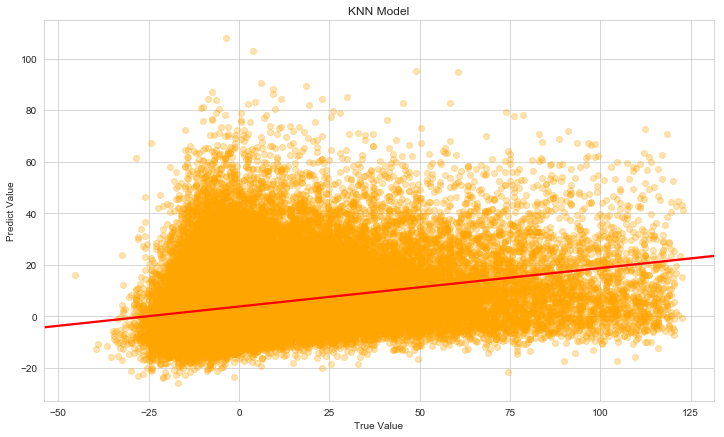

In [34]:
rmse = np.sqrt(mean_squared_error(y_test_sub, knn_pred))
print('RMSE', rmse)

plt.figure(figsize=(12,7))
sns.regplot(y_test_sub, rf_pred, color='orange', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('KNN Model')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

RMSE 21.287834340490917


C:\Users\A-Sha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


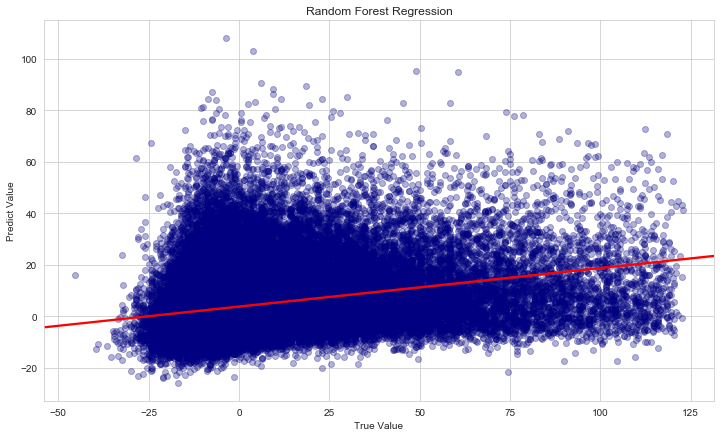

In [35]:
rmse = np.sqrt(mean_squared_error(y_test_sub, rf_pred))
print('RMSE', rmse)

plt.figure(figsize=(12,7))
sns.regplot(y_test_sub, rf_pred, color='navy', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Random Forest Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_sub, gb_pred))
print('RMSE', rmse)

plt.figure(figsize=(12,7))
sns.regplot(y_test_sub, gb_pred, color = 'green', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Gradient Boosting Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [37]:
# identigy the feature importance

importance = []
model = gb_model

for i in range(len(X_columns)):
    importance.append([X_columns[i], model.feature_importances_[i]])

features_imp = pd.DataFrame(importance).sort_values(by=1, ascending=False)
features_imp

,0,1
0,SCHEDULED_DEPARTURE,0.46
1,DATE,0.29
2,SCHEDULED_ARRIVAL,0.10
3,AIRLINE_NAME_Southwest Airlines Co.,0.05
4,AIRLINE_NAME_Delta Air Lines Inc.,0.03
5,AIRLINE_NAME_Spirit Air Lines,0.01
6,MONTH_6,0.01
7,AIRLINE_NAME_Alaska Airlines Inc.,0.01
16,ORIGIN_AVG_TEMP,0.01
18,ORIGIN_MAX_TEMP,0.01


In [ ]:
features_imp_0001 = features_imp[features_imp[1] > 0.0001]
features_imp_0001

_______
# For Submission

In [ ]:
import _pickle as cPickle

In [ ]:
with open("../../Model/gbm.pkl", "wb") as pickle_file:
    cPickle.dump(gb_model, pickle_file)

## Load the model

In [ ]:
loaded_model = load('../../Model/gbm2.pkl')
loaded_model

In [ ]:
new_X_train = X_train.iloc[1000000:1000002,:]
loaded_model_pred = loaded_model.predict(new_X_train)
loaded_model_pred

In [ ]:
np.sqrt(mean_squared_error(y_train.iloc[1000000:1000002], loaded_model_pred))